## Buisness case: We Need To Forcast No of Passenger In 1961-1 Month

In [1]:
### Importing the library
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
## Loa data
data = pd.read_csv('AirPassengers.csv')

In [3]:
## Basic Checks
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [5]:
data.shape

(144, 2)

In [6]:
data.columns

Index(['Month', '#Passengers'], dtype='object')

In [7]:
## Examint the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [8]:
data.describe()

,#Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [11]:
### Parsing the data and using date column as a index
data = pd.read_csv('AirPassengers.csv',parse_dates=[0],index_col='Month')
## parsing_dates used for convert datatype into date time and 0 is column locqation
## index_col used for set column as index

In [12]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## EDA

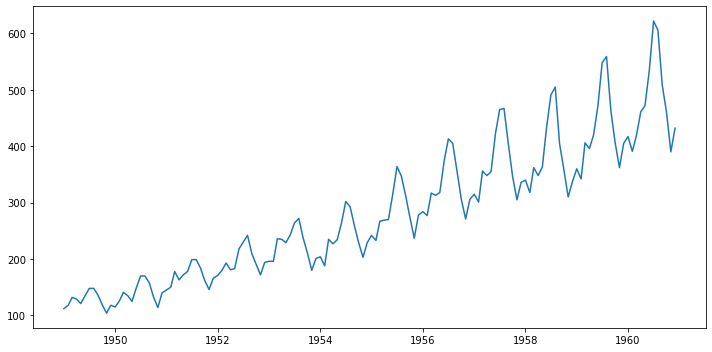

In [14]:
plt.figure(figsize=(10,5),facecolor='white')
plt.plot(data)
plt.tight_layout()

* Increses trend in no of passenger

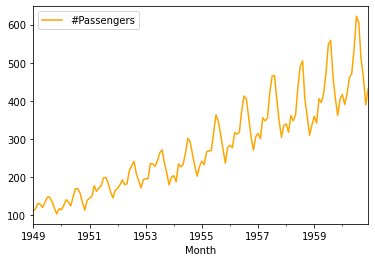

In [18]:
### Anothe way to plot
data.plot(color='orange')
plt.show()

## Model Creation 
### AR(Dont use this model)

In [19]:
### Plotting the auto Correlation plot
from statsmodels.graphics.tsaplots import plot_acf

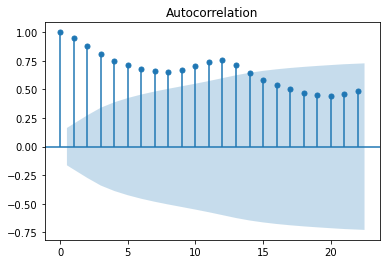

In [24]:
plot_acf(data)
plt.show()

* From auto corrleation plot it is clear that the given series is non- stationary

In [25]:
### making stationary by taking difference of 1
data1 = data.diff(periods=1)  ### diff --------> used difference function 
### this means calcilating the change in your rows(s)/column(s) over set numbers of periods or simpliy ,
# pandas diff will be subtract 1 cell value from another cell value within the same index

In [26]:
data1  # loding the data

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


In [27]:
data1 = data1.iloc[1:]  # columns from one to end

In [28]:
data1

,#Passengers
Month,
1949-02-01,6.0
1949-03-01,14.0
1949-04-01,-3.0
1949-05-01,-8.0
1949-06-01,14.0
...,...
1960-08-01,-16.0
1960-09-01,-98.0
1960-10-01,-47.0


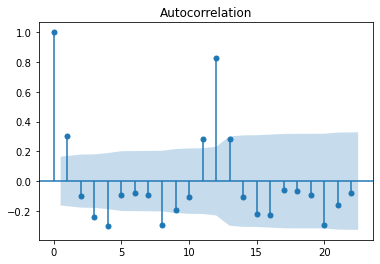

In [30]:
plot_acf(data1)
plt.show()

* Not become a statinory

In [31]:
data2 = data1.diff(periods=1)  ## used 2nd time

In [32]:
data2

,#Passengers
Month,
1949-02-01,NaN
1949-03-01,8.0
1949-04-01,-17.0
1949-05-01,-5.0
1949-06-01,22.0
...,...
1960-08-01,-103.0
1960-09-01,-82.0
1960-10-01,51.0


In [35]:
## making new veriable to store data2
data3 = data2.iloc[1:]

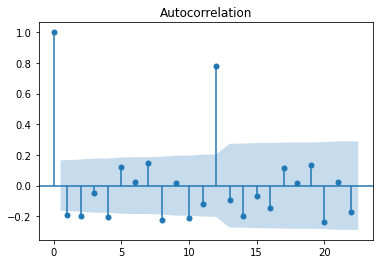

In [37]:
plot_acf(data3)
plt.show()

* Now the series become a stationary

### Create training and testing data

In [38]:
data3.shape

(142, 1)

In [39]:
train = data3[:100]  # from 0th rows to 100 rows for training
test = data3[100:] ## from 100 above remaing rows for testing

In [40]:
test.shape

(42, 1)

In [41]:
train.shape

(100, 1)

In [42]:
## information about data-type and null values
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100 entries, 1949-03-01 to 1957-06-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #Passengers  100 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB


### Apply auto regressive model

In [43]:
from statsmodels.tsa.ar_model import AR

In [45]:
## Model creation
ar_model = AR(train)  ## creating object and passing training data
ar_model_fit = ar_model.fit()  # training model

In [46]:
## prediction on model
predict = ar_model_fit.predict(start = 100, end=143) 

In [47]:
predict

1957-07-01   -26.325761
1957-08-01   -51.184110
1957-09-01   -43.959992
1957-10-01    -6.363909
1957-11-01    24.061033
1957-12-01    75.324375
1958-01-01   -30.525575
1958-02-01   -20.698153
1958-03-01    67.089284
1958-04-01   -56.564573
1958-05-01    13.377346
1958-06-01    66.337091
1958-07-01   -33.772981
1958-08-01   -58.228155
1958-09-01   -45.055018
1958-10-01   -14.690154
1958-11-01    35.370293
1958-12-01    80.696719
1959-01-01   -34.541873
1959-02-01   -19.600193
1959-03-01    67.142411
1959-04-01   -51.386197
1959-05-01    14.330762
1959-06-01    71.079740
1959-07-01   -41.567386
1959-08-01   -66.313619
1959-09-01   -47.008369
1959-10-01   -22.589679
1959-11-01    46.865050
1959-12-01    87.112502
1960-01-01   -38.965689
1960-02-01   -18.788673
1960-03-01    68.371352
1960-04-01   -46.488704
1960-05-01    17.168608
1960-06-01    74.840922
1960-07-01   -50.438749
1960-08-01   -75.197337
1960-09-01   -50.102526
1960-10-01   -29.954777
1960-11-01    58.602494
1960-12-01    94

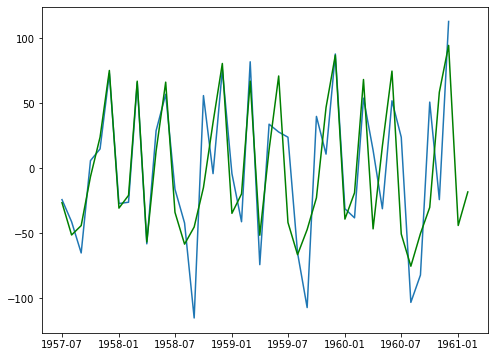

In [54]:
plt.figure(figsize=(8,6))
plt.plot(test)
plt.plot(predict,color='green')
plt.show()
#graph of test vs prediction  ## green one will be prediction

### Dontuse upper model

## ARIMA Model(Use this)

In [55]:
## importing library
from statsmodels.tsa.arima.model import ARIMA

In [56]:
### traing and testing data created upper model no need to create double

In [57]:
train.shape

(100, 1)

In [58]:
test.shape

(42, 1)

In [59]:
### Model object creation and fitting the model
model_arima = ARIMA(train, order=(1,1,0))  ## order p,d,q   
# p--> auto regressive
# q--> moving average
# d --> difference(intermidiate)
model_arima_fit = model_arima.fit()  # trainig

### model Evaluation

In [62]:
print(model_arima_fit.aic)   ## it should be less

1021.0396389673776


In [63]:
## predicting out of sample points
forcecasting = model_arima_fit.forecast(steps = 9)
## forcast done unseen data

In [64]:
forcecasting

1957-07-01    37.765356
1957-08-01    48.751565
1957-09-01    43.323244
1957-10-01    46.005395
1957-11-01    44.680135
1957-12-01    45.334950
1958-01-01    45.011404
1958-02-01    45.171269
1958-03-01    45.092279
Freq: MS, Name: predicted_mean, dtype: float64

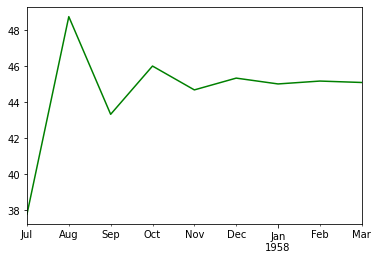

In [66]:
### ploting the forcated value
forcecasting.plot(color='green')
plt.show()

### Tuning 

In [68]:
### Getting the optimal values of p,q,d
import itertools ## used for itretion
p = d = q =range(0,2)  #becaues of samll data
## if we have lard data then range are increase
pdq = list(itertools.product(p,d,q))  ## used for cartition product to given opretion
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [73]:
##The Python try… except statement catches an exception. It is used to test code for an error which is written in the “try” statement.
#If an error is encountered, the contents of the “except” block are run.
for params in pdq:
    try:
        model_arima_1 = ARIMA(train,order=params,)  # training model on various pdq values
        model_arima_fit_1 = model_arima_1.fit()## training
        print(params,model_arima_fit_1.aic)  # printing parameter with aic value
    except:
        continue

(0, 0, 0) 967.913551830937
(0, 0, 1) 931.4372805505137
(0, 1, 0) 1046.7319001420174
(0, 1, 1) 963.8739393255743
(1, 0, 0) 963.0127961447531
(1, 0, 1) 928.7077561684616
(1, 1, 0) 1021.0396389673776
(1, 1, 1) 959.4979676508102


* taking the lowest aic valu parameter

In [74]:
### create final model with lowest aic parameter
model_arima_4 = ARIMA(train,order=(1,0,1))

model_arima_fit_4 = model_arima_4.fit() ## training

In [75]:
print(model_arima_fit_4.aic)  ## aic score

928.7077561684616


In [79]:
forcast1 = model_arima_fit.forecast(steps=9)
forcast1

1957-07-01    37.765356
1957-08-01    48.751565
1957-09-01    43.323244
1957-10-01    46.005395
1957-11-01    44.680135
1957-12-01    45.334950
1958-01-01    45.011404
1958-02-01    45.171269
1958-03-01    45.092279
Freq: MS, Name: predicted_mean, dtype: float64

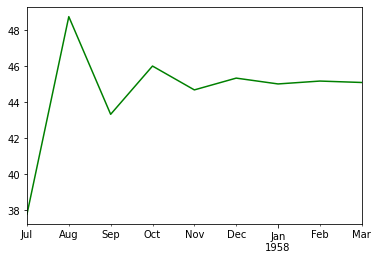

In [81]:
forcast1.plot(color='green')
plt.show()